In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy.interpolate import interp1d
import scipy as scp

def findmax(spline, a, b):
    range = np.linspace(a,b,2000)
    currmax = 0
    elmax = a
    for el in range:
        if spline(el) >= currmax:
            currmax = spline(el)
            elmax = el
    return (currmax, elmax)

In [32]:
D = 12*25.4 / 1000 # propellr diameter
rho = 1.22 # air density
omega3000 = 3000 * 2 * np.pi / 60 # 
omega4000 = 4000 * 2 * np.pi / 60 # 
omega5000 = 5000 * 2 * np.pi / 60 # 
omega6000 = 6000 * 2 * np.pi / 60 # 
omega7000 = 7000 * 2 * np.pi / 60 #
omega8000 = 8000 * 2 * np.pi / 60 # 
omega9000 = 9000 * 2 * np.pi / 60 # 
Vin = np.linspace(12.8, 16.8, 1000) # input voltage

def AR(om, Va):
    Om = om * 2 * np.pi / 60
    return 2*np.pi*Va/(Om*D)

def Vel(AR, om):
    om = om * 2 * np.pi / 60
    return om * D * AR / (2*np.pi)


Static = np.loadtxt("Static.txt", skiprows=1)
D3000 = np.loadtxt("3000RPM.txt", skiprows=1)
D6000 = np.loadtxt("6000RPM.txt", skiprows=1)
D4000 = np.loadtxt("4000RPM.txt", skiprows=1)
D5000 = np.loadtxt("5000RPM.txt", skiprows=1)
Va6000 = D6000[:, 0]* omega6000 * D / (2 * np.pi)
Va6000 = np.linspace(Va6000[0], Va6000[-1], len(D6000[:,0]))
Va3000 = D3000[:, 0]* omega3000 * D / (2 * np.pi)
Va3000 = np.linspace(Va3000[0], Va3000[-1], len(D3000[:,0]))
Va4000 = D4000[:, 0]* omega4000 * D / (2 * np.pi)
Va4000 = np.linspace(Va4000[0], Va4000[-1], len(D4000[:,0]))
Va5000 = D5000[:, 0]* omega5000 * D / (2 * np.pi)
Va5000 = np.linspace(Va5000[0], Va5000[-1], len(D5000[:,0]))

0.5624296962879641

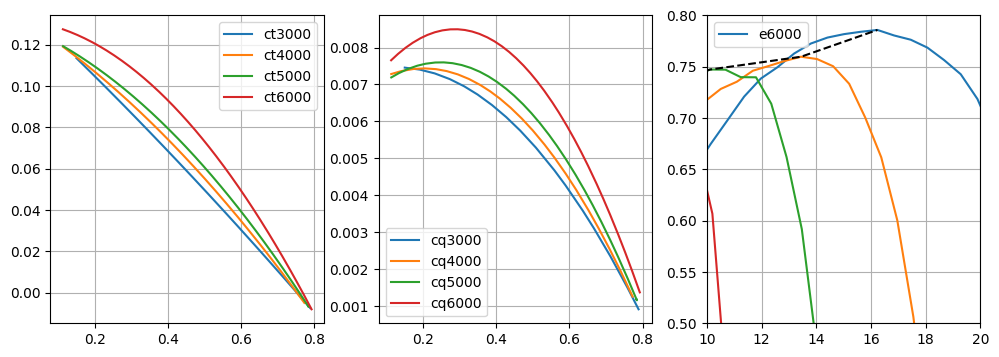

In [33]:
p3000ct = np.polyfit(D3000[:, 0], D3000[:, 1], 2)
p3000cq = np.polyfit(D3000[:, 0], D3000[:, 2]/(2*np.pi), 2)
p6000ct = np.polyfit(D6000[:, 0], D6000[:, 1], 2)
p6000cq = np.polyfit(D6000[:, 0], D6000[:, 2]/(2*np.pi), 2)
p4000ct = np.polyfit(D4000[:, 0], D4000[:, 1], 2)
p4000cq = np.polyfit(D4000[:, 0], D4000[:, 2]/(2*np.pi), 2)
p5000ct = np.polyfit(D5000[:, 0], D5000[:, 1], 2)
p5000cq = np.polyfit(D5000[:, 0], D5000[:, 2]/(2*np.pi), 2)


f3000ct = interp1d(D3000[:, 0], D3000[:, 1], 'cubic')
f6000ct = interp1d(D6000[:, 0], D6000[:, 1], 'cubic')
f4000ct = interp1d(D4000[:, 0], D4000[:, 1], 'cubic')
f5000ct = interp1d(D5000[:, 0], D5000[:, 1], 'cubic')

feta3 = interp1d(Va3000, D3000[:, 3])
e3m, v3m = findmax(feta3, 5, 10)
feta4 = interp1d(Va4000, D4000[:, 3])
e4m, v4m = findmax(feta4, 5, 15)
feta5 = interp1d(Va5000, D5000[:, 3])
e5m, v5m = findmax(feta5, 10, 18)
feta6 = interp1d(Va6000, D6000[:, 3])
e6m, v6m = findmax(feta6, 10, 20)


fig, ax = plt.subplots(1,3, figsize=(12,4))
ax.ravel()
ax[0].plot(D3000[:, 0], np.polyval(p3000ct, D3000[:, 0]), label = 'ct3000')
ax[0].plot(D4000[:, 0], np.polyval(p4000ct, D4000[:, 0]), label = 'ct4000')
ax[0].plot(D5000[:, 0], np.polyval(p5000ct, D5000[:, 0]), label = 'ct5000')
ax[0].plot(D6000[:, 0], np.polyval(p6000ct, D6000[:, 0]), label = 'ct6000')

ax[0].legend()
ax[0].grid('Major')

ax[1].plot(D3000[:, 0], np.polyval(p3000cq, D3000[:, 0]), label = 'cq3000')
ax[1].plot(D4000[:, 0], np.polyval(p4000cq, D4000[:, 0]), label = 'cq4000')
ax[1].plot(D5000[:, 0], np.polyval(p5000cq, D5000[:, 0]), label = 'cq5000')
ax[1].plot(D6000[:, 0], np.polyval(p6000cq, D6000[:, 0]), label = 'cq6000')

ax[1].legend()
ax[1].grid('Major')

# Интерполируем зависимость пика эффективности винта от скорости, набегающего потока (3 график), 
# чтобы понять, какая максимальная эффективность и на каких оборотах при выбранном значении воздушной скорости

feta = interp1d([v3m, v4m, v5m, v6m], [e3m, e4m, e5m, e6m])

ax[2].plot(Va6000, D6000[:, 3], label='e6000')
ax[2].plot(Va5000, D5000[:, 3])
ax[2].plot(Va4000, D4000[:, 3])
ax[2].plot(Va3000, D3000[:, 3])
ax[2].plot(np.linspace(v3m, v6m, 100), feta(np.linspace(v3m, v6m, 100)), '--', color='black')
ax[2].legend()
ax[2].set_ylim(0.5, 0.8)
ax[2].set_xlim(10, 20)
ax[2].grid('Major')

AR(7000, 20)

Text(0.5, 1.0, 'Тяга воздушного винта APC 12x80')

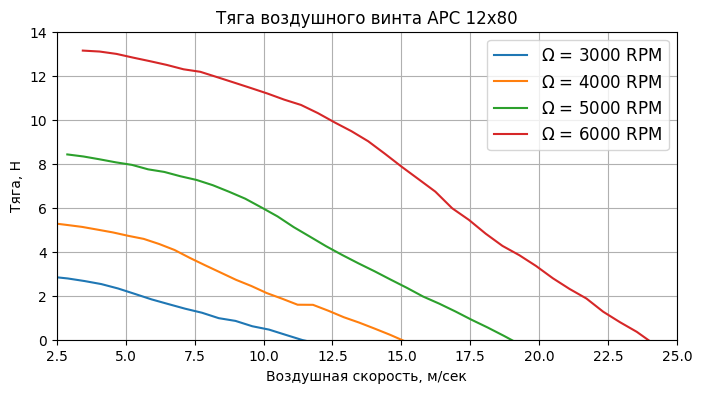

In [35]:
T3 = rho*D**4/(4*np.pi**2)*(omega3000**2)*f3000ct(D3000[:, 0])
T4 = rho*D**4/(4*np.pi**2)*(omega4000**2)*f4000ct(D4000[:, 0])
T5 = rho*D**4/(4*np.pi**2)*(omega5000**2)*f5000ct(D5000[:, 0])
T6 = rho*D**4/(4*np.pi**2)*(omega6000**2)*f6000ct(D6000[:, 0])
T7 = rho*D**4/(4*np.pi**2)*(omega7000**2)*f6000ct(D6000[:, 0])
T8 = rho*D**4/(4*np.pi**2)*(omega8000**2)*f6000ct(D6000[:, 0])
fig1, ax1 = plt.subplots(1,1, figsize=(8,4))
ax1.plot(Va3000, T3, label = r'$\Omega$ = 3000 RPM')
ax1.plot(Va4000, T4, label = r'$\Omega$ = 4000 RPM')
ax1.plot(Va5000, T5, label = r'$\Omega$ = 5000 RPM') 
ax1.plot(Va6000, T6, label = r'$\Omega$ = 6000 RPM') 
# ax1.plot(Va6000, T7, '--',label = r'$\Omega$ = 7000 RPM') 
# ax1.plot(Va6000, T8, '--',label = r'$\Omega$ = 8000 RPM')
ax1.set_xlim(2.5, 25)
ax1.set_ylim(0, 14)
ax1.legend(fontsize=12)
ax1.grid('Major')
ax1.set_xlabel('Воздушная скорость, м/сек')
ax1.set_ylabel('Тяга, Н')
ax1.set_title('Тяга воздушного винта APC 12x80')